<a href="https://colab.research.google.com/github/KarriLakshmiShanuAbhinaya/Tax_calculation/blob/main/Copy_of_Untitled28.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#do this
import tensorflow as tf
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense,Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#do this
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Define constants
IMG_WIDTH, IMG_HEIGHT = 224, 224
TRAIN_DIR = '/content/drive/MyDrive/MiniTomato/train'
VALIDATION_DIR = '/content/drive/MyDrive/MiniTomato/valid'
BATCH_SIZE = 32
EPOCHS = 10

In [ ]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2

def create_ssd_mobilenet_model():
    input_shape = (IMG_WIDTH, IMG_HEIGHT, 3)
    input_tensor = Input(shape=input_shape)

    # Load MobileNet backbone
    mobilenet = MobileNet(weights='imagenet', include_top=False, input_tensor=input_tensor)

    # Freeze the first few layers of MobileNet, unfreeze the rest for fine-tuning
    for layer in mobilenet.layers[:80]:
        layer.trainable = False
    for layer in mobilenet.layers[80:]:
        layer.trainable = True

    # Add SSD layers
    x = mobilenet.output
    x = Conv2D(512, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001))(x)
    x = MaxPooling2D((2, 2))(x)
    x = Flatten()(x)

    # Add Dropout for regularization
    x = Dense(128, activation='relu', kernel_regularizer=l2(0.001))(x)
    x = Dropout(0.5)(x)  # Dropout with 50% rate to avoid overfitting
    x = Dense(10, activation='softmax')(x)

    # Create the model
    model = Model(inputs=input_tensor, outputs=x)

    return model


In [ ]:
CLASS_NAMES = [
    'bacterial_spot',
    'early_blight',
    'healthy',
    'late_blight',
    'leaf_mold',
    'mosaic_virus',
    'septoria_leaf_spot',
    'target_spot',
    'twospotted_spider_mite',
    'yellow_leaf_curl_virus'
]

In [ ]:
# Compile the model
model = create_ssd_mobilenet_model()
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy']) # Changed lr to learning_rate

<ipython-input-4-72b4da2c9530>:11: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  mobilenet = MobileNet(weights='imagenet', include_top=False, input_tensor=input_tensor)


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Define data generators
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 2356 images belonging to 10 classes.


In [ ]:
validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 650 images belonging to 10 classes.


In [ ]:
# Uncomment below to train the model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)
history=model.fit(train_generator, validation_data=validation_generator, epochs=50, callbacks=[early_stopping, reduce_lr])

Epoch 1/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 26s 239ms/step - accuracy: 0.1451 - loss: 5.5220 - val_accuracy: 0.1908 - val_loss: 3.1570 - learning_rate: 0.0010
Epoch 2/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 16s 208ms/step - accuracy: 0.1638 - loss: 3.1211 - val_accuracy: 0.2323 - val_loss: 3.0472 - learning_rate: 0.0010
Epoch 3/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 20s 204ms/step - accuracy: 0.2187 - loss: 2.9195 - val_accuracy: 0.2831 - val_loss: 2.7859 - learning_rate: 0.0010
Epoch 4/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 18s 167ms/step - accuracy: 0.2847 - loss: 2.6490 - val_accuracy: 0.4477 - val_loss: 2.2997 - learning_rate: 0.0010
Epoch 5/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 23s 197ms/step - accuracy: 0.4484 - loss: 2.1953 - val_accuracy: 0.6538 - val_loss: 1.8941 - learning_rate: 0.0010
Epoch 6/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 16s 199ms/step - accuracy: 0.6190 - loss: 1.7585 - val_accuracy: 0.6785 - val_loss: 1.6850 - learning_rate: 0.0010
Epoch 7/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 18s 169ms/step - accuracy: 0.7854 - loss: 1.

In [ ]:
model.save('/content/drive/MyDrive/MiniTomato/ssd_mobilenet_model.h5')

In [ ]:
#do this
model = tf.keras.models.load_model('/content/drive/MyDrive/MiniTomato/ssd_mobilenet_model.h5')

In [ ]:
#do this
CLASS_NAMES = [
    'bacterial_spot',
    'early_blight',
    'healthy',
    'late_blight',
    'leaf_mold',
    'mosaic_virus',
    'septoria_leaf_spot',
    'target_spot',
    'twospotted_spider_mite',
    'yellow_leaf_curl_virus'
]

In [ ]:
#do this
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
# Import the cv2_imshow function from google.colab.patches
from google.colab.patches import cv2_imshow

def predict_and_visualize(image_path):
    # Read the image and check if it was successfully loaded
    im = cv2.imread(image_path)
    if im is None:
        raise FileNotFoundError(f"Failed to read the image {image_path}")

    # Preprocess the image
    image_resized = cv2.resize(im, (IMG_WIDTH, IMG_HEIGHT))
    image_normalized = image_resized / 255.0  # Normalize the image
    image_expanded = np.expand_dims(image_normalized, axis=0)  # Add batch dimension

    # Make predictions on the image
    predictions = model.predict(image_expanded)  # Model likely returns only predictions
    predicted_class = np.argmax(predictions, axis=1)[0]
    confidence = np.max(predictions)

    # Display the results
    if confidence > 0.5:  # Threshold for displaying predictions
        label = CLASS_NAMES[predicted_class]

        # Reduce text size (fontScale)
        font_scale = 0.6
        # Increase image size by resizing
        im = cv2.resize(im, (im.shape[1] * 2, im.shape[0] * 2))

        # Add label and confidence score to the image
        cv2.putText(im, f'{label}: {confidence:.2f}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (0, 255, 0), 2)

        # Use cv2_imshow to display the larger image
        cv2_imshow(im)
    else:
        print("No predictions above the confidence threshold.")

# Example usage:
# Assuming IMG_WIDTH, IMG_HEIGHT, CLASS_NAMES, and model are defined

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 887ms/step


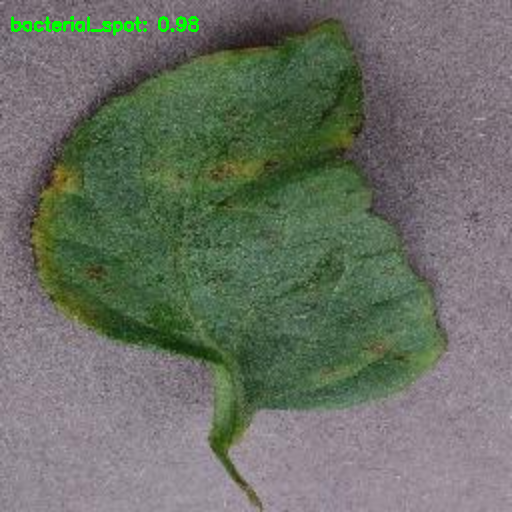

In [ ]:
#do this
image_path = '/content/drive/MyDrive/MiniTomato/valid/bacterial_spot/img_bs_144.jpg'  # Replace with your image path
predict_and_visualize(image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


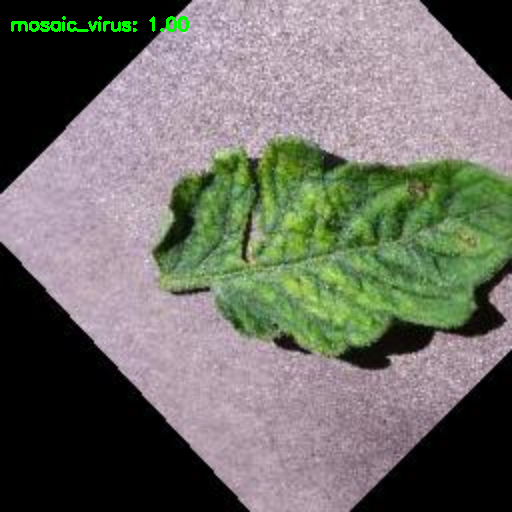

In [ ]:
image_path = '/content/drive/MyDrive/MiniTomato/valid/mosaic_virus/img_mv_108.jpg'  # Replace with your image path
predict_and_visualize(image_path)

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Define data generator for test set
test_datagen = ImageDataGenerator(rescale=1./255)

# Assuming you have a directory for the test set similar to training and validation sets
TEST_DIR = '/content/drive/MyDrive/MiniTomato/valid'  # Replace with the actual test set directory

test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False  # No need to shuffle for evaluation
)

# Get true labels
test_labels = test_generator.classes
test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)

# Make predictions
predictions = model.predict(test_generator, steps=test_steps_per_epoch)

# Get the predicted class indices
predicted_classes = np.argmax(predictions, axis=1)

# Get class indices to class label mapping
class_labels = list(test_generator.class_indices.keys())

# Generate classification report
print("Classification Report:\n")
classification_rep = classification_report(test_labels, predicted_classes, target_names=class_labels)
print(classification_rep)

# Confusion matrix
conf_matrix = confusion_matrix(test_labels, predicted_classes)
print("Confusion Matrix:\n", conf_matrix)

# Calculate final accuracy
accuracy = np.trace(conf_matrix) / float(np.sum(conf_matrix))
print(f"Final Accuracy: {accuracy:.4f}")

# Calculate overall sensitivity (recall) and specificity
TP = np.diag(conf_matrix)  # True Positives for each class (diagonal of confusion matrix)
FN = np.sum(conf_matrix, axis=1) - TP  # False Negatives for each class (row sums - TP)
FP = np.sum(conf_matrix, axis=0) - TP  # False Positives for each class (column sums - TP)
TN = np.sum(conf_matrix) - (FP + FN + TP)  # True Negatives for each class

# Calculate overall sensitivity and specificity
overall_sensitivity = np.sum(TP) / (np.sum(TP) + np.sum(FN))  # Total TP / (Total TP + Total FN)
overall_specificity = np.sum(TN) / (np.sum(TN) + np.sum(FP))  # Total TN / (Total TN + Total FP)

# Print overall sensitivity and specificity
print(f"Overall Sensitivity: {overall_sensitivity:.4f}")
print(f"Overall Specificity: {overall_specificity:.4f}")


Found 650 images belonging to 10 classes.


<ipython-input-13-d8b63e507892>:20: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)
/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


21/21 ━━━━━━━━━━━━━━━━━━━━ 220s 11s/step
Classification Report:

                        precision    recall  f1-score   support

        bacterial_spot       0.98      0.95      0.97        65
          early_blight       0.85      0.85      0.85        65
               healthy       0.98      0.86      0.92        65
           late_blight       0.89      0.85      0.87        65
             leaf_mold       0.94      0.89      0.91        65
          mosaic_virus       0.93      1.00      0.96        65
    septoria_leaf_spot       0.87      0.91      0.89        65
           target_spot       0.87      0.95      0.91        65
twospotted_spider_mite       0.91      0.94      0.92        65
yellow_leaf_curl_virus       0.97      0.97      0.97        65

              accuracy                           0.92       650
             macro avg       0.92      0.92      0.92       650
          weighted avg       0.92      0.92      0.92       650

Confusion Matrix:
 [[62  0  0  1  0 

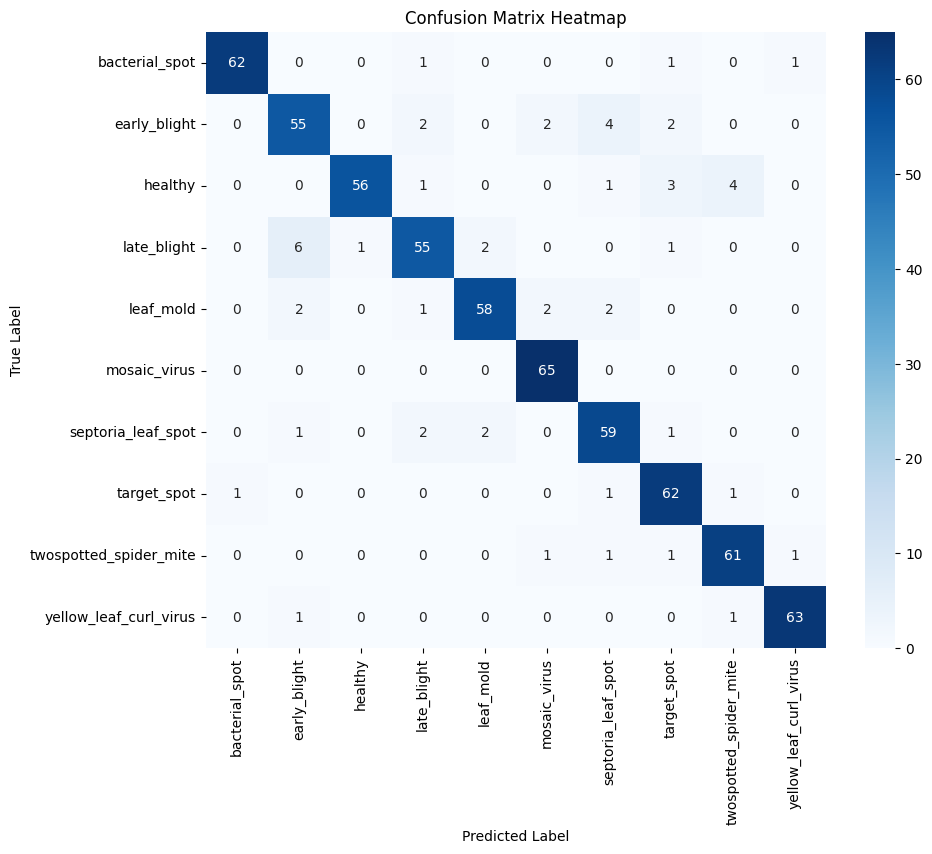

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Get confusion matrix and other necessary values
conf_matrix = confusion_matrix(test_labels, predicted_classes)

# Precision, Recall, and F1-score per class
TP = np.diag(conf_matrix)  # True Positives: Diagonal values of confusion matrix
FP = np.sum(conf_matrix, axis=0) - TP  # False Positives: Sum of columns minus diagonal
FN = np.sum(conf_matrix, axis=1) - TP  # False Negatives: Sum of rows minus diagonal
TN = np.sum(conf_matrix) - (FP + FN + TP)  # True Negatives: Rest of the matrix

# Precision, Recall, and F1-Score for each class
precision_per_class = TP / (TP + FP)
recall_per_class = TP / (TP + FN)
f1_per_class = 2 * (precision_per_class * recall_per_class) / (precision_per_class + recall_per_class)

# Macro (unweighted average)
macro_precision = np.mean(precision_per_class)
macro_recall = np.mean(recall_per_class)
macro_f1 = np.mean(f1_per_class)

# Weighted average
support = np.sum(conf_matrix, axis=1)  # Number of true instances per class
weighted_precision = np.sum(precision_per_class * support) / np.sum(support)
weighted_recall = np.sum(recall_per_class * support) / np.sum(support)
weighted_f1 = np.sum(f1_per_class * support) / np.sum(support)

# Micro average (global)
micro_precision = np.sum(TP) / (np.sum(TP) + np.sum(FP))
micro_recall = np.sum(TP) / (np.sum(TP) + np.sum(FN))
micro_f1 = 2 * (micro_precision * micro_recall) / (micro_precision + micro_recall)

# Display overall results
print(f"Overall Metrics (Micro Average):")
print(f"Precision: {micro_precision:.4f}, Recall: {micro_recall:.4f}, F1-Score: {micro_f1:.4f}\n")

print(f"Overall Metrics (Macro Average):")
print(f"Precision: {macro_precision:.4f}, Recall: {macro_recall:.4f}, F1-Score: {macro_f1:.4f}\n")

print(f"Overall Metrics (Weighted Average):")
print(f"Precision: {weighted_precision:.4f}, Recall: {weighted_recall:.4f}, F1-Score: {weighted_f1:.4f}\n")


Overall Metrics (Micro Average):
Precision: 0.9169, Recall: 0.9169, F1-Score: 0.9169

Overall Metrics (Macro Average):
Precision: 0.9184, Recall: 0.9169, F1-Score: 0.9168

Overall Metrics (Weighted Average):
Precision: 0.9184, Recall: 0.9169, F1-Score: 0.9168

